In [1]:
#load all of the data files and combine into one DataFrame
import pandas as pd
import seaborn as sns
df1 = pd.read_csv('SUMO_8hrs/record49999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df2 = pd.read_csv('SUMO_8hrs/record99999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df3 = pd.read_csv('SUMO_8hrs/record149999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df4 = pd.read_csv('SUMO_8hrs/record199999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df5 = pd.read_csv('SUMO_8hrs/record249999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df6 = df = pd.read_csv('SUMO_8hrs/record299999.txt', sep='\t',
names=['cur_time', 'vehicle_id', 'x_cord', 'y_cord', 'vehicle_or_pedestrian',
'cluster', 'signal', 'entry', 'maneuver'],
header=None,
index_col=False)
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)


In [2]:
df_simple = df[['vehicle_id', 'entry', 'maneuver', 'cluster']] #make a DataFrame with just four columns

In [3]:
df_simple = df_simple.groupby(['vehicle_id']).agg(entry=('entry', lambda x: x.iloc[0]),
    maneuver =('maneuver', lambda y: y.iloc[0]),
    cluster = ('cluster', 'first'))
#condense the DataFrame to have one row per vehicle, showing each vehicle's maneuver, entry, and cluster values

In [4]:
df_simple #displays new DataFrame

,entry,maneuver,cluster
vehicle_id,,,
0,1,1,5
1,0,0,10
3,2,0,3
4,2,1,1
5,1,2,4
...,...,...,...
10247,1,2,4
10248,2,1,2
10249,2,2,0


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k = 11
kmeans = KMeans(n_clusters=k)
df_simple['predicted_cluster'] = kmeans.fit_predict(df_simple[['entry', 'maneuver']])
#used sklearn library to cluster the data based on entry and maneuver

/opt/anaconda3/envs/GC/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [6]:
df_simple #displays updated DataFrame with cluster predictions

,entry,maneuver,cluster,predicted_cluster
vehicle_id,,,,
0,1,1,5,4
1,0,0,10,8
3,2,0,3,5
4,2,1,1,3
5,1,2,4,6
...,...,...,...,...
10247,1,2,4,6
10248,2,1,2,3
10249,2,2,0,2


In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

def cluster_translate(my_df):
    conf_matrix = confusion_matrix(my_df['cluster'], my_df['predicted_cluster'])
    

    cluster_mapping = {}
    for kmeans_cluster in range(conf_matrix.shape[1]):
        original_cluster = np.argmax(conf_matrix[:, kmeans_cluster])
        cluster_mapping[kmeans_cluster] = original_cluster
    my_df.loc[:, 'predicted_cluster'] = my_df['predicted_cluster'].map(cluster_mapping)
    df_comparison = my_df[['cluster', 'predicted_cluster']]
    
#created a function using a confusion matrix to map the cluster values to the matching ground-truth cluster
#values to compare the outputs

In [8]:
cluster_translate(df_simple) #convert the predicted numbers to actual cluster values

/var/folders/8n/kffxps591_g042ctnzfz3qxr0000gn/T/ipykernel_4225/1895926204.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5 10  3 ...  0  3  1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  my_df.loc[:, 'predicted_cluster'] = my_df['predicted_cluster'].map(cluster_mapping)


In [9]:
def percentage_match(comparison_df):
    matches = 0
    total = 0
    for index, row in comparison_df.iterrows():
        total+=1
        if row['predicted_cluster'] == row['cluster']:
            matches += 1
    return matches/total

# this function compares the predicted cluster values to the ground-truth cluster values

Text(0, 0.5, 'maneuver')

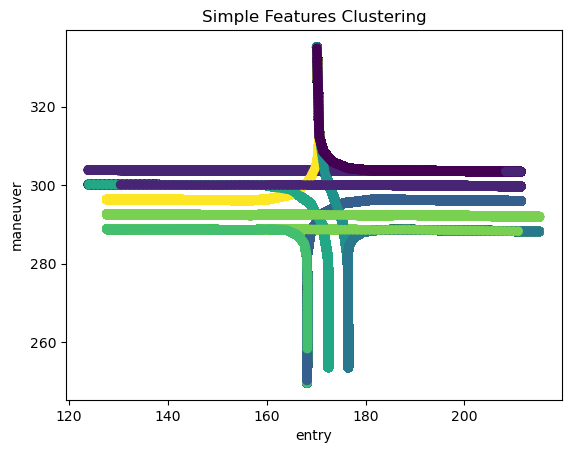

In [10]:
basic_df = pd.merge(df, df_simple[['predicted_cluster']], on='vehicle_id', how='left')
plt.scatter(basic_df['x_cord'], basic_df['y_cord'], c=basic_df['predicted_cluster'], cmap='viridis')
plt.title('Simple Features Clustering')
plt.xlabel('entry')
plt.ylabel('maneuver')
#graphed the trajectory data with a color code based on the predicted cluster using matplotlib

In [11]:
percentage_match(df_simple) #compare cluster values

0.8885848318999218

In [12]:
df_features = df.groupby('vehicle_id').agg(
    cluster=('cluster', 'first'),
    min_y_cord=('y_cord', 'min'),
    max_y_cord=('y_cord', 'max'),
    min_x_cord=('x_cord', 'min'),
    max_x_cord=('x_cord', 'max')
).reset_index()
#create a new DataFrame with four features and the cluster values

In [13]:
df_features

,vehicle_id,cluster,min_y_cord,max_y_cord,min_x_cord,max_x_cord
0,0,5,253.528941,335.121454,170.145156,176.478453
1,1,10,296.142287,334.778463,127.674940,170.665326
2,3,3,250.257184,296.288238,168.121803,211.398181
3,4,1,303.429853,303.856226,124.449324,211.395864
4,5,4,253.528941,288.619609,176.356870,214.743086
...,...,...,...,...,...,...
7669,10247,4,253.528941,288.618389,176.353856,214.400031
7670,10248,2,299.680714,300.119032,130.444032,211.397029
7671,10249,0,303.429853,311.933400,170.726969,211.395864
7672,10250,3,295.938855,296.288452,179.124021,211.398181


In [14]:
k = 11
kmeans = KMeans(n_clusters=k)
# Use kmeans to predict clusters
df_features['predicted_cluster'] = kmeans.fit_predict(df_features[['min_x_cord', 'max_x_cord', 'min_y_cord', 'max_y_cord']])


In [15]:
df_features #DataFrame with predicted cluster values

,vehicle_id,cluster,min_y_cord,max_y_cord,min_x_cord,max_x_cord,predicted_cluster
0,0,5,253.528941,335.121454,170.145156,176.478453,5
1,1,10,296.142287,334.778463,127.674940,170.665326,0
2,3,3,250.257184,296.288238,168.121803,211.398181,7
3,4,1,303.429853,303.856226,124.449324,211.395864,6
4,5,4,253.528941,288.619609,176.356870,214.743086,1
...,...,...,...,...,...,...,...
7669,10247,4,253.528941,288.618389,176.353856,214.400031,1
7670,10248,2,299.680714,300.119032,130.444032,211.397029,9
7671,10249,0,303.429853,311.933400,170.726969,211.395864,4
7672,10250,3,295.938855,296.288452,179.124021,211.398181,4


In [16]:
 cluster_translate(df_features) #convert the predicted numbers to actual cluster values

/var/folders/8n/kffxps591_g042ctnzfz3qxr0000gn/T/ipykernel_4225/1895926204.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5 10  3 ...  0  0  0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  my_df.loc[:, 'predicted_cluster'] = my_df['predicted_cluster'].map(cluster_mapping)


In [17]:
 df_features #DataFrame with new converted cluster values

,vehicle_id,cluster,min_y_cord,max_y_cord,min_x_cord,max_x_cord,predicted_cluster
0,0,5,253.528941,335.121454,170.145156,176.478453,5
1,1,10,296.142287,334.778463,127.674940,170.665326,10
2,3,3,250.257184,296.288238,168.121803,211.398181,3
3,4,1,303.429853,303.856226,124.449324,211.395864,1
4,5,4,253.528941,288.619609,176.356870,214.743086,4
...,...,...,...,...,...,...,...
7669,10247,4,253.528941,288.618389,176.353856,214.400031,4
7670,10248,2,299.680714,300.119032,130.444032,211.397029,2
7671,10249,0,303.429853,311.933400,170.726969,211.395864,0
7672,10250,3,295.938855,296.288452,179.124021,211.398181,0


In [18]:
percentage_match(df_features) #compare the values to the ground-truth cluster values

0.9997393797237425

In [19]:
spatial_df = pd.merge(df, df_features[['vehicle_id', 'predicted_cluster']], on='vehicle_id', how='left')
#add the predicted cluster values to the existing DataFrame in order to plot it

In [20]:
spatial_df

,cur_time,vehicle_id,x_cord,y_cord,vehicle_or_pedestrian,cluster,signal,entry,maneuver,predicted_cluster
0,1,0,176.478453,253.528941,0.0,5,0.0,1,1,5
1,2,0,176.478334,253.844006,0.0,5,0.0,1,1,5
2,3,0,176.478207,254.180874,0.0,5,0.0,1,1,5
3,4,0,176.478071,254.542244,0.0,5,0.0,1,1,5
4,5,0,176.477927,254.923311,0.0,5,0.0,1,1,5
...,...,...,...,...,...,...,...,...,...,...
2193802,299999,10242,159.101177,296.279506,0.0,10,0.0,0,0,10
2193803,299999,10248,130.444032,300.119032,0.0,2,3.0,2,1,2
2193804,299999,10249,170.726969,311.933400,0.0,0,3.0,2,2,0
2193805,299999,10250,179.124021,295.938855,0.0,3,3.0,2,0,0


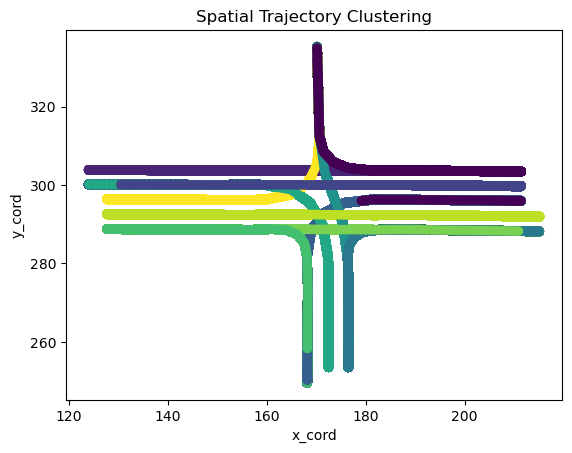

In [21]:
plt.scatter(spatial_df['x_cord'], spatial_df['y_cord'], c=spatial_df['predicted_cluster'], cmap='viridis')
plt.title('Spatial Trajectory Clustering')
plt.xlabel('x_cord')
plt.ylabel('y_cord')
plt.show()
#plot the x_cord and y_cord values to show vehicle trajectories, color coded for their predicted cluster values

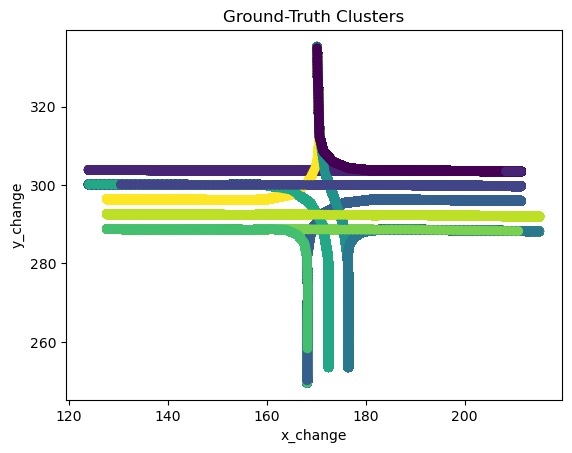

In [22]:
plt.scatter(spatial_df['x_cord'], spatial_df['y_cord'], c=spatial_df['cluster'], cmap='viridis')
plt.title('Ground-Truth Clusters')
plt.xlabel('x_change')
plt.ylabel('y_change')
plt.show()
#plot the x_cord and y_values once again, this time color coded for the ground-truth cluster values for comparison

In [23]:
temporal_df = df.groupby('vehicle_id').agg(
    time_taken=('cur_time', lambda x: x.iloc[-1] - x.iloc[0]), cluster = ('cluster', 'first')
).reset_index()
#create new DataFrame with the amount of time each vehicle needed to cross the intersection

In [24]:
temporal_df #display this DataFrame

,vehicle_id,time_taken,cluster
0,0,512,5
1,1,294,10
2,3,112,3
3,4,108,1
4,5,435,4
...,...,...,...
7669,10247,97,4
7670,10248,138,2
7671,10249,68,0
7672,10250,48,3


In [25]:
temporal_df['normalized_time'] = temporal_df['time_taken']/temporal_df['time_taken'].max()
#normalize the data by dividing by the maximum value

In [26]:
temporal_df # display normalized data

,vehicle_id,time_taken,cluster,normalized_time
0,0,512,5,0.697548
1,1,294,10,0.400545
2,3,112,3,0.152589
3,4,108,1,0.147139
4,5,435,4,0.592643
...,...,...,...,...
7669,10247,97,4,0.132153
7670,10248,138,2,0.188011
7671,10249,68,0,0.092643
7672,10250,48,3,0.065395


In [27]:
temporal_df['predicted_cluster'] = kmeans.fit_predict(temporal_df[['normalized_time']])
time_df = pd.merge(df, temporal_df[['vehicle_id', 'predicted_cluster']], on='vehicle_id', how='left')
#use k-means to cluster the data based on time

In [28]:
cluster_translate(temporal_df) #convert the predicted numbers to actual cluster values

/var/folders/8n/kffxps591_g042ctnzfz3qxr0000gn/T/ipykernel_4225/1895926204.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 3 3 ... 3 3 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  my_df.loc[:, 'predicted_cluster'] = my_df['predicted_cluster'].map(cluster_mapping)


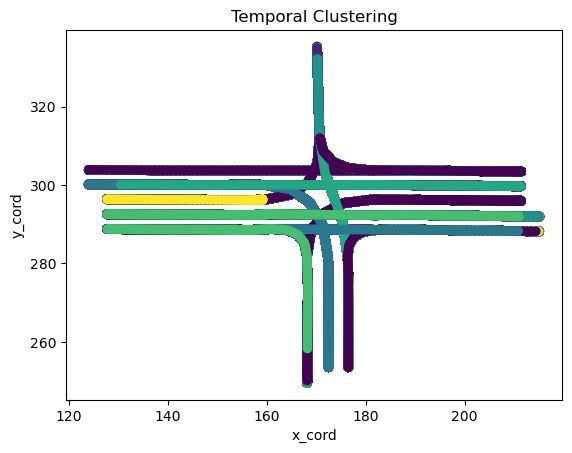

In [29]:
plt.scatter(time_df['x_cord'], time_df['y_cord'], c=time_df['predicted_cluster'], cmap='viridis')
plt.title('Temporal Clustering')
plt.xlabel('x_cord')
plt.ylabel('y_cord')
plt.show()

In [30]:
temporal_df #new DataFrame with predicted cluster values

,vehicle_id,time_taken,cluster,normalized_time,predicted_cluster
0,0,512,5,0.697548,6
1,1,294,10,0.400545,3
2,3,112,3,0.152589,3
3,4,108,1,0.147139,3
4,5,435,4,0.592643,10
...,...,...,...,...,...
7669,10247,97,4,0.132153,3
7670,10248,138,2,0.188011,3
7671,10249,68,0,0.092643,3
7672,10250,48,3,0.065395,3


In [31]:
percentage_match(temporal_df)

0.17670054730258014